In [38]:
import pandas as pd

data = pd.read_csv('arquitectura100_KNN.csv')
data.head()

,filename,label,X,Y,predict
0,f6_020_068.tif,0.000,209186.7906,6082580.119,0.040971
1,f6_077_036.tif,0.144,208872.6546,6082020.564,0.567913
2,f6_067_036.tif,0.437,208872.6546,6082118.732,0.243965
3,f6_030_054.tif,0.288,209049.3561,6082481.952,0.291680
4,f6_036_039.tif,0.413,208902.1049,6082423.051,0.161206


## KNN para la imagen F6 , con sub-imágenes con resolución de 10 metros 

# Descripción de dataframe : 

- filename : nombre de las sub-imágenes formadas a partir de f6 
- Label : % de cobertura real 
- X y Y : coordenadas del centro de la imagen 
- predict : predicción de CNN 

In [39]:
data=data.iloc[0:633]
data

,filename,label,X,Y,predict
0,f6_020_068.tif,0.000,209186.7906,6082580.119,0.040971
1,f6_077_036.tif,0.144,208872.6546,6082020.564,0.567913
2,f6_067_036.tif,0.437,208872.6546,6082118.732,0.243965
3,f6_030_054.tif,0.288,209049.3561,6082481.952,0.291680
4,f6_036_039.tif,0.413,208902.1049,6082423.051,0.161206
...,...,...,...,...,...
628,f6_076_016.tif,0.454,208676.3197,6082030.381,0.342110
629,f6_092_017.tif,0.000,208686.1364,6081873.313,0.080869
630,f6_047_040.tif,0.443,208911.9216,6082315.067,0.195179
631,f6_036_034.tif,0.327,208853.0212,6082423.051,0.390088


In [40]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html 

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X = data.iloc[:,[2,3]]
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
model1 = KNeighborsRegressor() ## clasificador 
model1.fit(X_train, y_train) ## entrenamiento de datos 

y_pred = model1.predict(X_test)#Test

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("MSE", mean_squared_error(y_test, y_pred))
print("R-cuadrado",r2_score(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE 0.054060773081761
R-cuadrado 0.2714051051412806
RMSE 0.23250972685408453


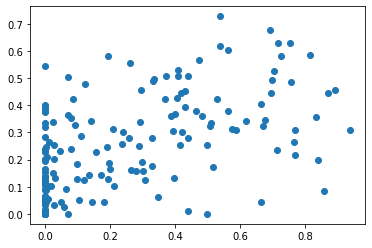

In [43]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

## Validación cruzada con busqueda de paramátros de vecinos cercanos

In [44]:
param_KNN = { 
    'n_neighbors': [3,5,10,15,50,80]
}

In [45]:
MSE=[]
R2=[]
RMSE=[]

from sklearn.model_selection import KFold 
from sklearn import metrics
kfold=KFold(n_splits = 5, shuffle =True)
for indexTrainData, indexTestData in kfold.split(data):
    X_train=data.iloc[indexTrainData,2:4]
    y_train=data.iloc[indexTrainData,1]
    X_test=data.iloc[indexTestData,2:4]
    y_test=data.iloc[indexTestData,1]
    
    modelo=KNeighborsRegressor()
    modelo_grid = GridSearchCV(estimator=modelo, param_grid=param_KNN, cv= 5)
    modelo_grid.fit(X_train,y_train)
    modelo_grid_best=modelo_grid.best_estimator_
    print("Best parametros",modelo_grid.best_params_)
    y_pred=modelo_grid_best.predict(X_test)
    MSE.append(mean_squared_error(y_test,y_pred))
    R2.append(r2_score(y_test,y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))

Best parametros {'n_neighbors': 10}
Best parametros {'n_neighbors': 5}
Best parametros {'n_neighbors': 10}
Best parametros {'n_neighbors': 15}
Best parametros {'n_neighbors': 15}


In [46]:
MSE

[0.05692673992125984,
 0.05005074803149606,
 0.06202034165354331,
 0.05043402962962962,
 0.06024493738977073]

In [47]:
R2

[0.24030131529485832,
 0.03391482663804435,
 0.24779739531612288,
 0.17130495992397177,
 0.22918127266290012]

In [48]:
RMSE

[0.23859325204468765,
 0.22372024501930096,
 0.24903883563320664,
 0.22457522042654132,
 0.24544844140831437]

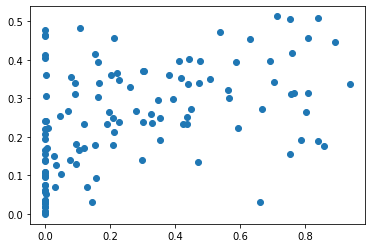

In [49]:
plt.scatter(y_test,y_pred)